In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
import os 
direc = '/u/home/gergel'
nodes50 = xr.open_dataset(os.path.join(direc, 'timing_pointrun_50nodes.1948-09-01-00000.nc'))
nodes10 = xr.open_dataset(os.path.join(direc, 'timing_pointrun_10nodes.1948-09-01-00000.nc'))
domain = xr.open_dataset(os.path.join(direc, 'domain.lnd.20171023.nc'))

In [3]:
nodes_masked = nodes50.OUT_SOILT_FBFLAG.where(domain.mask ==1, drop=True)

In [13]:
nodes_masked10 = nodes10.OUT_SOILT_FBFLAG.where(domain.mask ==1, drop=True)

In [4]:
fbflags50_vals = nodes_masked.values

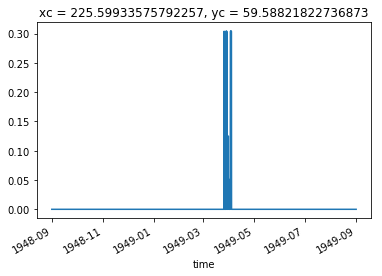

In [14]:
nodes_masked10.sum(axis=1).plot()

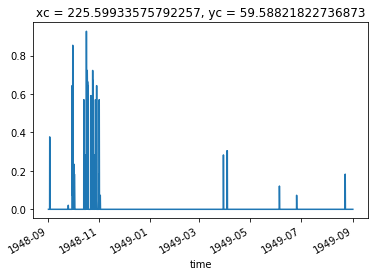

In [12]:
nodes_masked.sum(axis=1).plot()

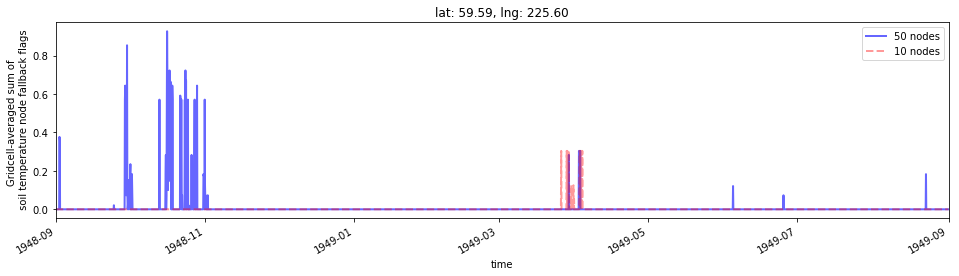

In [25]:
fig, axes = plt.subplots(1,1, figsize=(16,4))
lw = 2.0
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue', 'alpha': 0.6}
nodes_masked.sum(axis=1).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red', 'linestyle': '--', 'alpha': 0.4}
nodes_masked10.sum(axis=1).plot(**kwargs)
plt.xlim(['1948-09', '1949-09'])
plt.legend()
plt.ylabel('Gridcell-averaged sum of \n soil temperature node fallback flags')
plt.title("lat: 59.59, lng: 225.60")

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

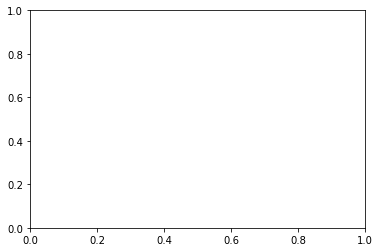

In [17]:
plt.xticks()

In [8]:
fbflags50_vals.max()

0.85399997234344482

In [ ]:
nodes50.OUT_SOILT_FBFLAG.sum(axis=1).where(domain.mask == 1, drop=True).plot()